In [1]:

%matplotlib inline

# Import dependencies
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt

file = os.path.join('MidwestMurderData.csv')
midwest_homicide_df = pd.read_csv(file)
midwest_homicide_df.columns

Index(['index', 'ID', 'CNTYFIPS', 'Ori', 'State', 'Agency', 'Agentype',
       'Source', 'Solved', 'Year', 'StateName', 'Month', 'Incident',
       'ActionType', 'Homicide', 'Situation', 'VicAge', 'VicSex', 'VicRace',
       'VicEthnic', 'OffAge', 'OffSex', 'OffRace', 'OffEthnic', 'Weapon',
       'Relationship', 'Circumstance', 'Subcircum', 'VicCount', 'OffCount',
       'FileDate', 'fstate', 'MSA'],
      dtype='object')

In [2]:
relationship_df = midwest_homicide_df[['Relationship', 'VicSex','Weapon', 'OffSex']]


In [3]:
#Combine similar weapons together
relationship_df['Weapon'] = relationship_df['Weapon'].replace(
                                                {"Knife or cutting instrument": "Sharp Object",
                                                "Handgun - pistol, revolver, etc": "Gun",
                                                "Shotgun": "Gun",
                                                "Strangulation - hanging": "Strangulation",
                                                "Personal weapons, includes beating": "Beating/Personal",
                                                "Blunt object - hammer, club, etc" : "Blunt Object",
                                                "Rifle": "Gun",
                                                "Firearm, type not stated": "Gun",
                                                "Asphyxiation - includes death by gas": "Asphyxiation",
                                                "Other gun": "Gun"})


C:\Users\write\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [4]:
#Combine similar relationships together
relationship_df['Relationship'] = relationship_df["Relationship"].replace(
                                                  {'Brother': 'Sibling',
                                                   'Sister': 'Sibling',
                                                   'Father': 'Parent',
                                                   'Mother': 'Parent',
                                                   'Daughter': 'Child',
                                                   'Son': 'Child',
                                                   'Stepson': 'Child',
                                                   "Stepdaughter": "Child",
                                                   "Homosexual relationship": 'Partner',
                                                   "Boyfriend" : "Partner",
                                                   "Girlfriend" : "Partner",
                                                   "Common-law husband" : "Partner",
                                                   "Common-law wife" : "Partner",
                                                   "Ex-husband" : "Spouse",
                                                   "Ex-wife" : "Spouse",
                                                   "Stepmother" : "Parent",
                                                   "Stepfather" : "Parent",
                                                   "Husband" : "Spouse",
                                                   "Wife" : "Spouse",
                                                  "Friend": 'Other - known to victim',
                                                  "Neighbor": 'Other - known to victim',
                                                  "Employee": 'Other - known to victim',
                                                  "Employer": 'Other - known to victim',
                                                  "In-law" : 'Other - known to victim'})
                                       

C:\Users\write\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [5]:
#female = victims_df.loc[victims_df["VicSex"] == "Female", :]

In [6]:
#Create female victim dataframe by relationship
victims_df = relationship_df[['Relationship', 'VicSex']]
female = victims_df.loc[victims_df["VicSex"] == "Female", :]
female_victims = female.groupby('Relationship').count()
female_victims_df = female_victims.rename(columns={"VicSex": "Female Victim"})
female_df = female_victims_df.reset_index().sort_values("Female Victim")
female_df

,Relationship,Female Victim
7,Sibling,348
3,Other family,648
4,Parent,1039
1,Child,2103
9,Stranger,2525
2,Other - known to victim,2900
5,Partner,4006
8,Spouse,5035
0,Acquaintance,5206
6,Relationship not determined,9592


In [7]:
#Create male victim dataframe by relationship
male = victims_df.loc[victims_df["VicSex"] == "Male", :]
male_victims = male.groupby('Relationship').count()
male_victims_df = male_victims.rename(columns={"VicSex": "Male Victim"})
male_df = male_victims_df.reset_index().sort_values("Male Victim")
male_df

,Relationship,Male Victim
7,Sibling,1190
4,Parent,1336
3,Other family,1410
8,Spouse,2324
1,Child,2597
5,Partner,2692
2,Other - known to victim,10357
9,Stranger,16626
0,Acquaintance,25393
6,Relationship not determined,47540


In [10]:
# #Create unknown victim dataframe by relationship
#unknown = victims_df.loc[victims_df["VicSex"] == "Unknown",:]
#unknown_victims = unknown.groupby('Relationship').count()
#unknown_victims_df = unknown_victims.rename(columns={"VicSex": "Gender Unknown"})


In [11]:
# # By relationship, summarize the count of female, male, and unknown victims
#total_relationships = relationship_df.groupby('Relationship')['VicSex'].count()
#total_df = pd.DataFrame(total_relationships).rename(columns={'VicSex': 'Total'})


In [12]:
# #Merge all dataframes to summarize female, male, gender unknown, and total dataframes
#mf_summary_df = pd.merge(female_victims_df, male_victims_df, how='outer', on='Relationship')
#summary_df = pd.merge(mf_summary_df, unknown_victims_df, how='outer', on='Relationship')
#total_summary_df = pd.merge(summary_df, total_df, how='outer', on='Relationship')
#final_df = total_summary_df.fillna(0)

Text(0, 0.5, 'Relationship')

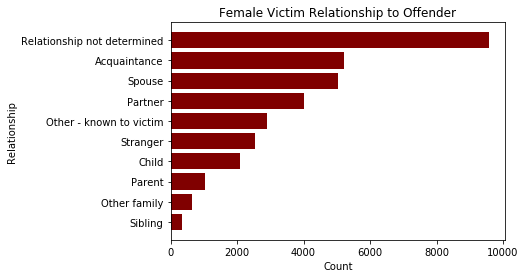

In [13]:
#Plot Female Victim Relationship Information
y_axis = np.arange(len(female_df))
tick_locations = [value for value in y_axis]

#plt.figure(figsize=(20,3))
plt.barh(y_axis, female_df["Female Victim"], color='maroon', alpha= 1.0, align="center")
plt.yticks(tick_locations, female_df["Relationship"], rotation="horizontal")
         

# Set a Title and labels
plt.title("Female Victim Relationship to Offender")
plt.xlabel("Count")
plt.ylabel("Relationship")

Text(0, 0.5, 'Relationship')

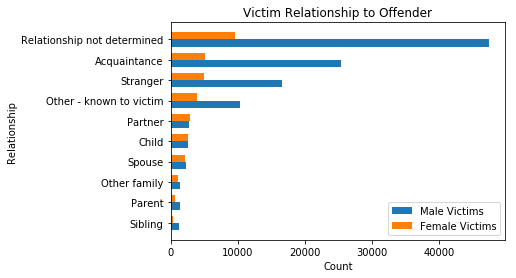

In [17]:
N = 10

male_data = (male_df["Male Victim"])
female_data = (female_df["Female Victim"])

ind = np.arange(N)
width = 0.35
plt.barh(ind, male_data, width, label='Male Victims')
plt.barh(ind + width, female_data, width, label='Female Victims')

plt.yticks(ind + width / 2, male_df["Relationship"])
plt.legend(loc='lower right')


# Set a Title and labels
plt.title("Victim Relationship to Offender")
plt.xlabel("Count")
plt.ylabel("Relationship")